In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import files
df = files.upload()

Saving data_balita.csv to data_balita.csv


In [3]:
# membaca dataset dari file CSV
df = pd.read_csv('data_balita.csv')
df

,Umur,Jenis_Kelamin,Tinggi_Badan,Status_Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [4]:
#menghitung jumlah dari setiap gizi
category_counts = df['Status_Gizi'].value_counts()
category_counts

normal              67755
severely stunted    19869
tinggi              19560
stunted             13815
Name: Status_Gizi, dtype: int64

In [5]:
# merubah menjadi encode jenis kelamin
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].map({'laki-laki': 0, 'perempuan': 1})

In [6]:
_# merubah menjadi encode status gizi
df['Status_Gizi'] = df['Status_Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})
df

,Umur,Jenis_Kelamin,Tinggi_Badan,Status_Gizi
0,0,0,44.591973,1
1,0,0,56.705203,3
2,0,0,46.863358,2
3,0,0,47.508026,2
4,0,0,42.743494,0
...,...,...,...,...
120994,60,1,100.600000,2
120995,60,1,98.300000,1
120996,60,1,121.300000,2
120997,60,1,112.200000,2


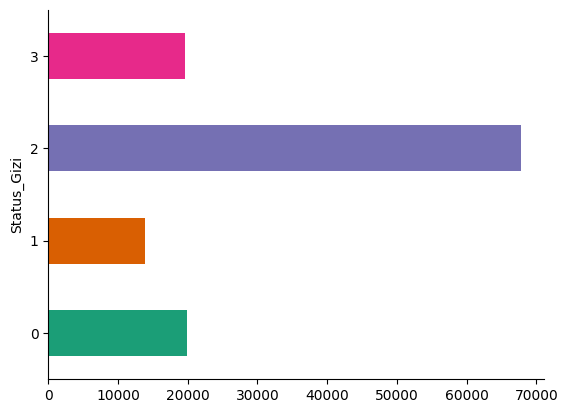

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Status_Gizi').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
from sklearn.model_selection import train_test_split

# memisahkan fitur dan target
X = df.iloc[:, 1:6]
X = df.drop('Status_Gizi', axis=1)
y = df['Status_Gizi']

# membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,Umur,Jenis_Kelamin,Tinggi_Badan
0,0,0,44.591973
1,0,0,56.705203
2,0,0,46.863358
3,0,0,47.508026
4,0,0,42.743494
...,...,...,...
120994,60,1,100.600000
120995,60,1,98.300000
120996,60,1,121.300000
120997,60,1,112.200000


In [9]:
from sklearn.neighbors import KNeighborsClassifier

# membuat objek KNN dengan k=3
knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1)

# melatih model KNN dengan data latih
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1)

In [10]:
from sklearn.metrics import accuracy_score

# membuat prediksi dengan data uji
y_pred = knn.predict(X_test)

# menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred) * 100
print('Akurasi model KNN:', accuracy)

Akurasi model KNN: 99.90495867768595


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print('confusion_matrix knn:')
confusion_matrix(y_test, y_pred)

confusion_matrix knn:


array([[ 4129,     1,     0,     0],
       [    6,  2782,     2,     0],
       [    0,     3, 13372,     7],
       [    0,     0,     4,  3894]])

In [12]:
print(classification_report(y_test.values.reshape(-1, 1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      2790
           2       1.00      1.00      1.00     13382
           3       1.00      1.00      1.00      3898

    accuracy                           1.00     24200
   macro avg       1.00      1.00      1.00     24200
weighted avg       1.00      1.00      1.00     24200



In [13]:
# Testing model KNN
test = pd.DataFrame({'Umur': [30], 'Jenis_Kelamin': [1], 'Tinggi_Badan': [86.2]})

pred = knn.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

Predicted Score = [2]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle

# Inisialisasi model KNN
model_knn = KNeighborsClassifier(n_neighbors=3)  # Anda dapat menyesuaikan n_neighbors sesuai kebutuhan

# Latih model menggunakan data pelatihan
model_knn.fit(X_train, y_train)

# Simpan model KNN ke dalam file menggunakan pickle
with open('model_knn.pkl', 'wb') as model_file:
    pickle.dump(model_knn, model_file)


In [16]:
# Export the model
import joblib

joblib.dump(knn, 'knn.model')

['knn.model']